In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1=pd.read_csv('train.csv')

In [3]:
data1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
data1.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
data1.isnull().mean()

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

In [7]:
data1.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
data1.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [9]:
data1.shape

(381109, 12)

EDA:
    1) VISUALIZE

UNIVIRATE ANALYSIS

In [10]:
data1['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

CLEAR CASE OF IMBALANCE PROBLEM

GENDER

[]

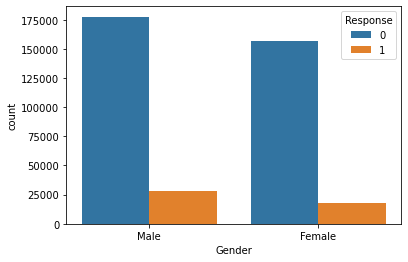

In [11]:
sns.countplot('Gender',data=data1,hue='Response')
plt.plot()

In [12]:
data1.groupby(['Gender'])['Response'].value_counts(normalize=True)*100

Gender  Response
Female  0           89.609759
        1           10.390241
Male    0           86.158893
        1           13.841107
Name: Response, dtype: float64

AGE

[]

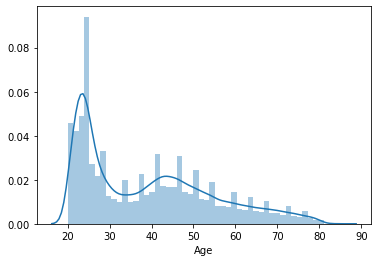

In [13]:
sns.distplot(data1['Age'])
plt.plot()

In [14]:
data1['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [15]:
def brac(x):
    if (x>=20) & (x<31):
        return '20-30'
    if(x>=31) & (x<41):
        return '31-40'
    if(x>=41) & (x<51):
        return '41-50'
    if(x>=51) & (x<61):
        return '51-60'
    if(x>=61) & (x<71):
        return '61-70'
    if(x>=71) & (x<81):
        return '71-80'
    if(x>=81) & (x<91):
        return '81-90'
        

In [16]:
data1['AgeBracket']=data1['Age'].apply(brac)

In [17]:
data1[['Age','AgeBracket']]

,Age,AgeBracket
0,44,41-50
1,76,71-80
2,47,41-50
3,21,20-30
4,29,20-30
...,...,...
381104,74,71-80
381105,30,20-30
381106,21,20-30
381107,68,61-70


[]

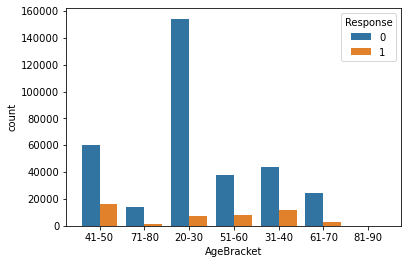

In [18]:
sns.countplot('AgeBracket',data=data1,hue='Response')
plt.plot()

In [19]:
t1=pd.DataFrame(data1.groupby(['AgeBracket'])['Response'].value_counts(normalize=True)*100)

In [20]:
t1

Response
AgeBracket Response           
20-30      0         95.551248
           1          4.448752
31-40      0         78.976850
           1         21.023150
41-50      0         78.898092
           1         21.101908
51-60      0         82.968767
           1         17.031233
61-70      0         89.068899
           1         10.931101
71-80      0         92.535359
           1          7.464641
81-90      0         95.348837
           1          4.651163

SO age bracket of 31-40 and 41-50 and even 51-60 are the ones of who should be contacted first
for vehicle insurance premium

DRIVING LICENSE

In [21]:
pd.DataFrame(data1.groupby(['Driving_License'])['Response'].value_counts(normalize=True))

Response
Driving_License Response          
0               0         0.949507
                1         0.050493
1               0         0.877283
                1         0.122717

people with drivig liscence should be contacted first to pitch the insurance

PTRVIOUSLY INSURED

In [22]:
pd.DataFrame(data1.groupby(['Previously_Insured'])['Response'].value_counts(normalize=True))

Response
Previously_Insured Response          
0                  0         0.774546
                   1         0.225454
1                  0         0.999095
                   1         0.000905

People who are not previously insured should be contacted first

VEHICLE AGE

In [23]:
data1['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [24]:
pd.DataFrame(data1.groupby(['Vehicle_Age'])['Response'].value_counts(normalize=True))

Response
Vehicle_Age Response          
1-2 Year    0         0.826245
            1         0.173755
< 1 Year    0         0.956295
            1         0.043705
> 2 Years   0         0.706254
            1         0.293746

  .>2 years and 1-2 years should be contacted first

VEHICLE DAMAGE

In [25]:
data1['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
pd.DataFrame(data1.groupby(['Vehicle_Damage'])['Response'].value_counts(normalize=True))

Response
Vehicle_Damage Response          
No             0         0.994796
               1         0.005204
Yes            0         0.762345
               1         0.237655

People who have damaged the vehicle should be contacted first

ANNUAL PREMIUM

In [27]:
data1['Annual_Premium'].unique()

array([ 40454.,  33536.,  38294., ...,  20706., 101664.,  69845.])

In [28]:
t3=pd.DataFrame(data1.groupby(['Annual_Premium'])['Response'].value_counts(normalize=True))

In [29]:
t3

Response
Annual_Premium Response          
2630.0         0         0.868906
               1         0.131094
6098.0         0         1.000000
7670.0         0         1.000000
8739.0         0         1.000000
...                           ...
489663.0       1         1.000000
495106.0       0         1.000000
508073.0       0         1.000000
540165.0       0         0.750000
               1         0.250000

[70294 rows x 1 columns]

In [30]:
data1['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [31]:
data3=data1.copy()

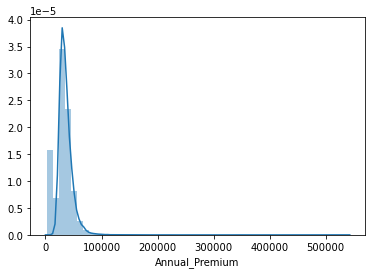

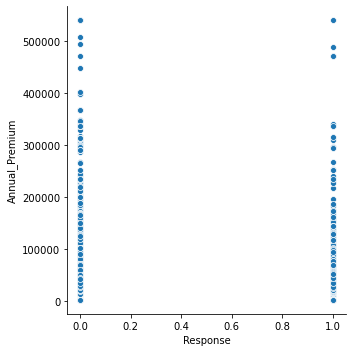

In [32]:
sns.distplot(data1['Annual_Premium'])
sns.relplot('Response','Annual_Premium',data=data1)

Annual premium is health premium taken by the customer
lets find out in what range of annual premium does customer go for vehicle insurance

In [33]:
data1['quantile_5']=pd.qcut(data1['Annual_Premium'], q=5)

In [34]:
pd.DataFrame(data1.groupby(['quantile_5'])['Response'].value_counts(normalize=True)*100)

Response
quantile_5          Response           
(2629.999, 21583.6] 0         87.600693
                    1         12.399307
(21583.6, 29082.0]  0         90.091295
                    1          9.908705
(29082.0, 34406.0]  0         88.789461
                    1         11.210539
(34406.0, 41711.0]  0         87.026516
                    1         12.973484
(41711.0, 540165.0] 0         85.209919
                    1         14.790081

We can contact all customers in case of annual premium

POLICY SALES CAHNNEL

In [35]:
pp=pd.DataFrame(data1.groupby(['Policy_Sales_Channel'])['Response'].value_counts(normalize=True)*100)

In [36]:
pp

Response
Policy_Sales_Channel Response           
1.0                  0         96.741155
                     1          3.258845
2.0                  0         75.000000
                     1         25.000000
3.0                  0         69.598470
...                                  ...
159.0                1          1.960784
160.0                0         97.819000
                     1          2.181000
163.0                0         69.581749
                     1         30.418251

[274 rows x 1 columns]

ENCODING RARE LABELS IN POLICY SALES CHANNEL

In [37]:
def find_non_rare_labels(df, variable, tolerance):
    
    temp = df.groupby([variable])[variable].count() / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [38]:
def rare_encoding(new, variable, tolerance):
    frequent_cat = find_non_rare_labels(data3, variable, tolerance)

    # re-group rare labels
    data3[variable] = np.where(data3[variable].isin(
        frequent_cat), data3[variable], 'Rare')

    return data3

In [39]:
for variable in ['Policy_Sales_Channel']:
    
     data3= rare_encoding(data3, variable, 0.01)

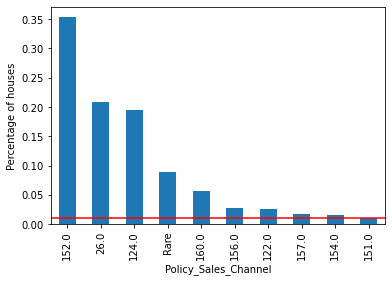

In [40]:
for col in ['Policy_Sales_Channel']:

    temp_df = pd.Series(data3[col].value_counts() / len(data3) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.01, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

In [41]:
pd.DataFrame(data3.groupby(['Policy_Sales_Channel'])['Response'].value_counts(normalize=True)*100)

Response
Policy_Sales_Channel Response           
122.0                0         82.678751
                     1         17.321249
124.0                0         81.085208
                     1         18.914792
151.0                0         96.859717
                     1          3.140283
152.0                0         97.137642
                     1          2.862358
154.0                0         75.404639
                     1         24.595361
156.0                0         78.454179
                     1         21.545821
157.0                0         73.159785
                     1         26.840215
160.0                0         97.819000
                     1          2.181000
26.0                 0         80.061481
                     1         19.938519
Rare                 0         84.916019
                     1         15.083981

For policy sales channel BY TAKING greater than 20% chance we should contact customers which are contacted through
154,156,157 sales channel

VINTAGE

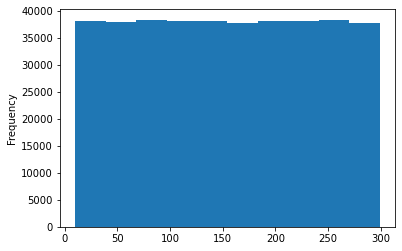

In [42]:
data1['Vintage'].plot(kind='hist')

In [43]:
data1['Vin_q']=pd.cut(data1['Vintage'], bins=10)

In [44]:
pd.DataFrame(data1.groupby(['Vin_q'])['Response'].value_counts(normalize=True)*100)

Response
Vin_q          Response           
(9.711, 38.9]  0         87.558956
               1         12.441044
(38.9, 67.8]   0         87.624882
               1         12.375118
(67.8, 96.7]   0         88.016981
               1         11.983019
(96.7, 125.6]  0         87.873237
               1         12.126763
(125.6, 154.5] 0         87.491809
               1         12.508191
(154.5, 183.4] 0         87.909093
               1         12.090907
(183.4, 212.3] 0         87.454784
               1         12.545216
(212.3, 241.2] 0         87.723214
               1         12.276786
(241.2, 270.1] 0         88.001881
               1         11.998119
(270.1, 299.0] 0         87.780450
               1         12.219550

In vintage also we can include all

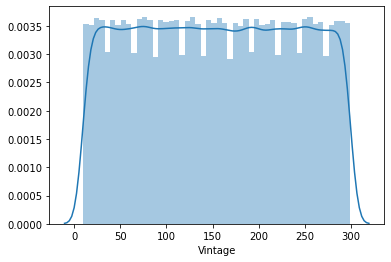

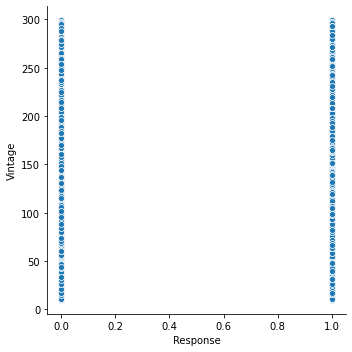

In [45]:
sns.distplot(data1['Vintage'])
sns.relplot('Response','Vintage',data=data1)

REGION CODE

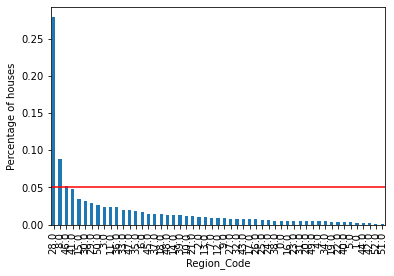

In [46]:
for col in ['Region_Code']:

    temp_df = pd.Series(data3[col].value_counts() / len(data3) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

In [47]:
def find_non_rare_labels(df, variable, tolerance):
    
    temp = df.groupby([variable])[variable].count() / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [48]:
find_non_rare_labels(data3, 'Region_Code', 0.02)

[3.0, 8.0, 11.0, 15.0, 28.0, 29.0, 30.0, 33.0, 36.0, 41.0, 46.0, 50.0]

In [49]:
def rare_encoding(new, variable, tolerance):
    frequent_cat = find_non_rare_labels(data3, variable, tolerance)

    # re-group rare labels
    data3[variable] = np.where(data3[variable].isin(
        frequent_cat), data3[variable], 'Rare')

    return data3

In [50]:
for variable in ['Region_Code']:
    
     data3= rare_encoding(data3, variable, 0.01)

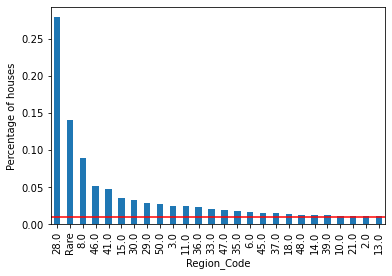

In [51]:
for col in ['Region_Code']:

    temp_df = pd.Series(data3[col].value_counts() / len(data3) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.01, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

In [52]:
pd.DataFrame(data3.groupby(['Region_Code'])['Response'].value_counts(normalize=True)*100)

Response
Region_Code Response           
10.0        0         93.987197
            1          6.012803
11.0        0         88.724003
            1         11.275997
13.0        0         90.981169
            1          9.018831
14.0        0         90.979051
            1          9.020949
15.0        0         92.801323
            1          7.198677
18.0        0         86.842616
            1         13.157384
2.0         0         92.892521
            1          7.107479
21.0        0         92.897328
            1          7.102672
28.0        0         81.283654
            1         18.716346
29.0        0         87.663805
            1         12.336195
3.0         0         87.233813
            1         12.766187
30.0        0         92.617505
            1          7.382495
33.0        0         90.070551
            1          9.929449
35.0        0         87.539614
            1         12.460386
36.0        0         92.008639
            1          7.991361
37.0        0         92.074168
            1          7.925832
39.0        0         87.639966
            1         12.360034
41.0        0         87.822373
            1         12.177627
45.0        0         89.027654
            1         10.972346
46.0        0         89.710871
            1         10.289129
47.0        0         91.231845
            1          8.768155
48.0        0         89.809870
            1         10.190130
50.0        0         93.732305
            1          6.267695
6.0         0         93.009554
            1          6.990446
8.0         0         90.385807
            1          9.614193
Rare        0         89.977541
            1         10.022459

for region code we can use greater than 10% chance
region 11,18,20,29,3,25,39,41

Customer list that has to be contatced first

In [53]:
data_contact=data3[(data3['Driving_License']==1) & 
      (data3['Previously_Insured']==0) &
     (data3['Vehicle_Age']=='> 2 Years') & (data3['Vehicle_Damage']=='Yes') & 
      ((data3['AgeBracket']=='31-40') | (data3['AgeBracket']=='41-50') | (data3['AgeBracket']=='51-60')) & 
                  ((data3['Region_Code']=='11.0') | (data3['Region_Code']=='18.0') |
                  (data3['Region_Code']=='20.0') | (data3['Region_Code']=='29.0') |
                  (data3['Region_Code']=='3.0') | (data3['Region_Code']=='25.0') |
                  (data3['Region_Code']=='39.0') | (data3['Region_Code']=='41.0')) & 
                  ((data3['Policy_Sales_Channel']=='154.0') | (data3['Policy_Sales_Channel']=='156.0') |
                  (data3['Policy_Sales_Channel']=='157.0'))]

In [54]:
data_contact.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AgeBracket
958,959,Male,36,1,29.0,0,> 2 Years,Yes,28075.0,156.0,230,0,31-40
2347,2348,Male,38,1,29.0,0,> 2 Years,Yes,34742.0,157.0,163,0,31-40
9336,9337,Female,35,1,3.0,0,> 2 Years,Yes,2630.0,156.0,74,0,31-40
19946,19947,Male,46,1,41.0,0,> 2 Years,Yes,33768.0,154.0,72,0,41-50
30206,30207,Male,44,1,18.0,0,> 2 Years,Yes,35222.0,154.0,114,0,41-50


In [55]:
data_contact.shape

(106, 13)

SO from 381109 customers we have boiled down the list to 106,
the sales department can use this list and contact them first

In [56]:
cor1=data1.corr()

[]

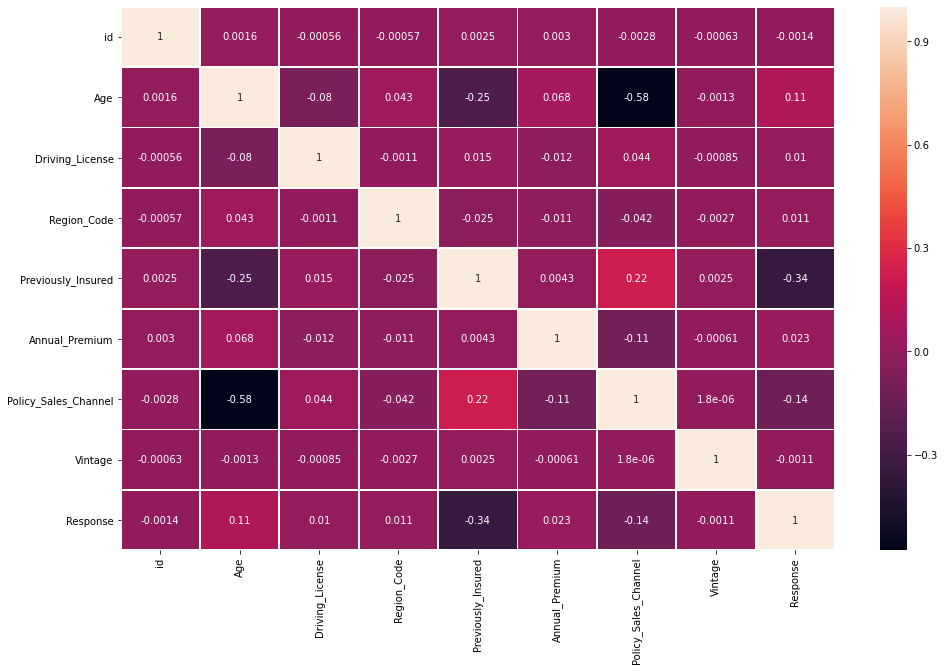

In [57]:
plt.figure(figsize = (16,10))
sns.heatmap(cor1,linewidths=1,annot=True)
plt.plot()

Here we have to take care of Recall more than Precision
By taking care of Recall, We say that we want to increase Our True positives and reduce False neagtive
We dont want to miss out customers who have actually responed 1

We also want to take care of type 1 error
that is we dont want to classify who has response as 0 to response of 1
it may increase our cost on business side, as calling may increase

but recall has higher importance here

In [58]:
data2=data1.copy()

In [59]:
data2.drop(['AgeBracket','quantile_5','Vin_q'],axis=1,inplace=True)

In [60]:
data2.shape

(381109, 12)

In [61]:
data_test=pd.read_csv('test1.csv')

In [62]:
data_test.shape

(127037, 11)

In [63]:
#data_test.drop(['Annual_Premium','Vintage'],axis=1,inplace=True)

In [64]:
new=pd.concat([data2,data_test],axis=0)

In [65]:
new['Vintage']=new['Vintage']/365

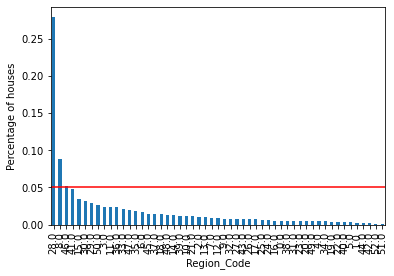

In [66]:
for col in ['Region_Code']:

    temp_df = pd.Series(new[col].value_counts() / len(new) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

In [67]:
def find_non_rare_labels(df, variable, tolerance):
    
    temp = df.groupby([variable])[variable].count() / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [68]:
find_non_rare_labels(new, 'Region_Code', 0.02)

[3.0, 8.0, 11.0, 15.0, 28.0, 29.0, 30.0, 33.0, 36.0, 41.0, 46.0, 50.0]

In [69]:
[x for x in new['Region_Code'].unique(
) if x not in find_non_rare_labels(new, 'Region_Code', 0.02)]

[6.0,
 35.0,
 45.0,
 26.0,
 16.0,
 47.0,
 48.0,
 19.0,
 39.0,
 23.0,
 37.0,
 5.0,
 17.0,
 2.0,
 7.0,
 27.0,
 25.0,
 13.0,
 18.0,
 20.0,
 49.0,
 22.0,
 44.0,
 0.0,
 9.0,
 31.0,
 12.0,
 34.0,
 21.0,
 10.0,
 14.0,
 38.0,
 24.0,
 40.0,
 43.0,
 32.0,
 4.0,
 51.0,
 42.0,
 1.0,
 52.0]

In [70]:
new1=new.copy()

In [71]:
def rare_encoding(new, variable, tolerance):
    frequent_cat = find_non_rare_labels(new1, variable, tolerance)

    # re-group rare labels
    new1[variable] = np.where(new1[variable].isin(
        frequent_cat), new1[variable], 'Rare')

    return new1

In [72]:
for variable in ['Region_Code']:
    
     new1= rare_encoding(new1, variable, 0.01)

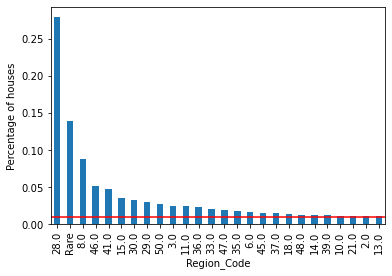

In [73]:
for col in ['Region_Code']:

    temp_df = pd.Series(new1[col].value_counts() / len(new1) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.01, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

In [74]:
g1=pd.DataFrame((new1.groupby(['Region_Code'])['Response'].value_counts(normalize=True)*100).sort_values(ascending=False))

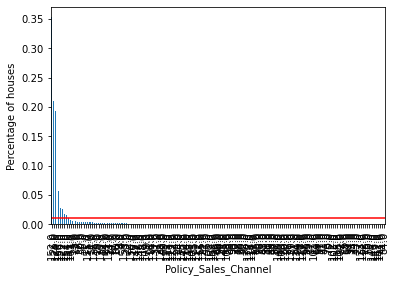

In [75]:
for col in ['Policy_Sales_Channel']:

    temp_df = pd.Series(new[col].value_counts() / len(new) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.01, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

In [76]:
def find_non_rare_labels(df, variable, tolerance):
    
    temp = df.groupby([variable])[variable].count() / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [77]:
find_non_rare_labels(new1, 'Policy_Sales_Channel', 0.01)

[26.0, 122.0, 124.0, 151.0, 152.0, 154.0, 156.0, 157.0, 160.0]

In [78]:
def rare_encoding(new, variable, tolerance):
    frequent_cat = find_non_rare_labels(new1, variable, tolerance)

    # re-group rare labels
    new1[variable] = np.where(new1[variable].isin(
        frequent_cat), new1[variable], 'Rare')

    return new1

In [79]:
for variable in ['Policy_Sales_Channel']:
    
     new1= rare_encoding(new1, variable, 0.01)

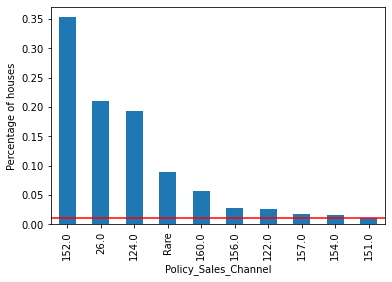

In [80]:
for col in ['Policy_Sales_Channel']:

    temp_df = pd.Series(new1[col].value_counts() / len(new1) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.01, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

In [81]:
pc=pd.DataFrame((new1.groupby(['Policy_Sales_Channel'])['Response'].value_counts(normalize=True)*100).sort_values(ascending=False))

In [82]:
pc

,,Response
Policy_Sales_Channel,Response,
160.0,0.0,97.819000
152.0,0.0,97.137642
151.0,0.0,96.859717
Rare,0.0,84.916019
122.0,0.0,82.678751
124.0,0.0,81.085208
26.0,0.0,80.061481
156.0,0.0,78.454179
154.0,0.0,75.404639


In [83]:
new1.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code              object
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel     object
Vintage                 float64
Response                float64
dtype: object

In [84]:
#from feature_engine.categorical_encoders import CountFrequencyCategoricalEncoder

In [85]:
#dl=dict(new['Driving_License'].value_counts())

In [86]:
#new['Driving_License']=new['Driving_License'].replace(dl)

In [87]:
#a=dict(new['Region_Code'].value_counts())

In [88]:
#new['Region_Code']=new['Region_Code'].replace(a)

In [89]:
new1['Vehicle_Age']=new1['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

In [90]:
new1['Vehicle_Damage']=new1['Vehicle_Damage'].replace({'Yes':1,'No':0})

In [91]:
new1['Gender']=new1['Gender'].replace({'Male':1,'Female':0})

In [92]:
new1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,0.594521,1.0
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,0.501370,0.0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,0.073973,1.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,0.556164,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,0.106849,0.0


In [93]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [94]:
#new.columns

In [95]:
new1.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code              object
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel     object
Vintage                 float64
Response                float64
dtype: object

In [96]:
new1['Region_Code'].unique()

array(['28.0', '3.0', '11.0', '41.0', '33.0', '6.0', '35.0', '50.0',
       '15.0', '45.0', '8.0', '36.0', '30.0', 'Rare', '47.0', '48.0',
       '39.0', '37.0', '2.0', '29.0', '46.0', '13.0', '18.0', '21.0',
       '10.0', '14.0'], dtype=object)

In [97]:
#new1['Region_Code']=new1['Region_Code'].replace({'Rare':0})

In [98]:

#new1=new1.astype({'Region_Code':float})

OUTLIER Treatment

In [99]:
new1.describe()

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
count,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,381109.000000
mean,254073.500000,0.539855,38.808413,0.997936,0.458667,0.609406,0.504280,30554.453041,0.422850,0.122563
std,146689.259281,0.498410,15.500179,0.045388,0.498289,0.567422,0.499982,17146.574625,0.229230,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,0.027397,0.000000
25%,127037.250000,0.000000,25.000000,1.000000,0.000000,0.000000,0.000000,24381.000000,0.224658,0.000000
50%,254073.500000,1.000000,36.000000,1.000000,0.000000,1.000000,1.000000,31661.000000,0.421918,0.000000
75%,381109.750000,1.000000,49.000000,1.000000,1.000000,1.000000,1.000000,39403.750000,0.621918,0.000000
max,508146.000000,1.000000,85.000000,1.000000,1.000000,2.000000,1.000000,540165.000000,0.819178,1.000000


In [100]:
import scipy.stats as stats

In [101]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

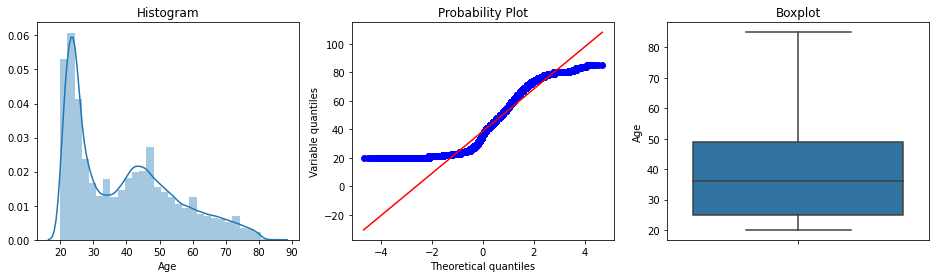

In [102]:
diagnostic_plots(new, 'Age')

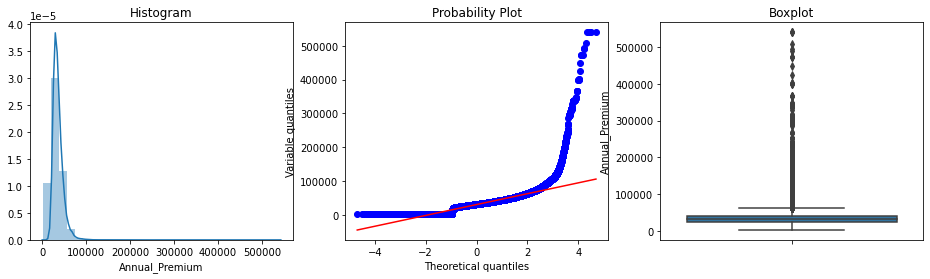

In [103]:
diagnostic_plots(new, 'Annual_Premium')

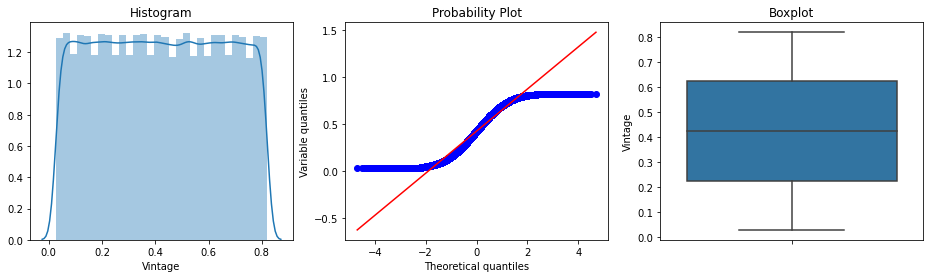

In [104]:
diagnostic_plots(new, 'Vintage')

In [105]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [106]:
ap_upper_limit, ap_lower_limit = find_skewed_boundaries(new, 'Annual_Premium', 1.5)
ap_upper_limit, ap_lower_limit

(61937.875, 1846.875)

In [107]:
# Now let's replace the outliers by the maximum and minimum limit

new['Annual_Premium']= np.where(new['Annual_Premium'] > ap_upper_limit, ap_upper_limit,
                       np.where(new['Annual_Premium'] < ap_lower_limit, ap_lower_limit, new['Annual_Premium']))

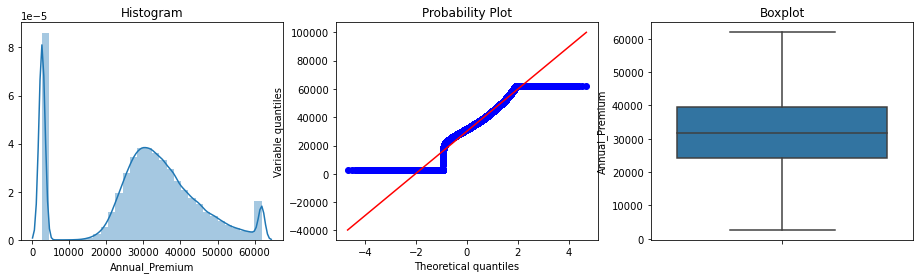

In [108]:
diagnostic_plots(new, 'Annual_Premium')

In [109]:
new['Annual_Premium'].describe()

count    508146.000000
mean      30144.799546
std       15480.486129
min        2630.000000
25%       24381.000000
50%       31661.000000
75%       39403.750000
max       61937.875000
Name: Annual_Premium, dtype: float64

In [110]:
ohe_enc = OneHotCategoricalEncoder(
    top_categories=None, # we can select which variables to encode
    drop_last=True) # to return k-1, false to return k


ohe_enc.fit(new1)

OneHotCategoricalEncoder(drop_last=True,
                         variables=['Region_Code', 'Policy_Sales_Channel'])

In [111]:
tmp = ohe_enc.transform(new1)

tmp.head()

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Region_Code_10.0,Policy_Sales_Channel_26.0,Policy_Sales_Channel_152.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_124.0,Policy_Sales_Channel_Rare,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_122.0,Policy_Sales_Channel_154.0
0,1,1,44,1,0,2,1,40454.0,0.594521,1.0,...,0,1,0,0,0,0,0,0,0,0
1,2,1,76,1,0,1,0,33536.0,0.501370,0.0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,47,1,0,2,1,38294.0,0.073973,1.0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,21,1,1,0,0,28619.0,0.556164,0.0,...,0,0,1,0,0,0,0,0,0,0
4,5,0,29,1,1,0,0,27496.0,0.106849,0.0,...,0,0,1,0,0,0,0,0,0,0


In [112]:
#tmp.drop('Driving_License',axis=1,inplace=True)

In [113]:
tmp.drop('id',axis=1,inplace=True)

In [114]:
Train=tmp.iloc[0:381109]

In [115]:
Test=tmp.iloc[381109:]

In [116]:
X=Train.drop('Response',axis=1)

In [117]:
Y=Train['Response']

In [118]:
from imblearn.over_sampling import RandomOverSampler

In [119]:
os =  RandomOverSampler(0.70)

C:\Users\surface pro\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [120]:
X_train_res, y_train_res = os.fit_sample(X, Y)

In [121]:
X_train_res.shape,y_train_res.shape

((568478, 42), (568478,))

In [122]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0.0: 334399, 1.0: 46710})
Resampled dataset shape Counter({0.0: 334399, 1.0: 234079})


In [123]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [124]:
ordered_rank_features=SelectKBest(score_func=chi2,k=5)
ordered_feature=ordered_rank_features.fit(X_train_res,y_train_res)

In [125]:

dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)



In [126]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [127]:
features_rank.columns=['Features','Score']


In [128]:
X_train_res.shape

(568478, 42)

In [129]:
features_rank.nlargest(15,'Score')

,Features,Score
6,Annual_Premium,5.311543e+06
3,Previously_Insured,1.200532e+05
1,Age,9.465525e+04
5,Vehicle_Damage,6.082774e+04
34,Policy_Sales_Channel_152.0,4.946668e+04
4,Vehicle_Age,2.815067e+04
33,Policy_Sales_Channel_26.0,1.212618e+04
8,Region_Code_28.0,1.167670e+04
35,Policy_Sales_Channel_160.0,9.527841e+03
36,Policy_Sales_Channel_124.0,8.543559e+03


In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_res,
                                                    y_train_res,
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((397934, 42), (170544, 42))

In [132]:
Test.drop('Response',axis=1,inplace=True)

C:\Users\surface pro\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [133]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, roc_auc_score

In [134]:
test1=pd.read_csv('test.csv')

In [135]:
id1=test1['id']

In [136]:
from lightgbm import LGBMClassifier
lgbcl = LGBMClassifier(boosting_type='gbdt',n_estimators=500,depth=10,learning_rate=0.04,objective='binary',metric='auc',
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=294,n_jobs=-1)
lgbcl= lgbcl.fit(X_train, Y_train,eval_metric='auc',verbose=2)
y_lgb = lgbcl.predict(X_test)
probs_tr = lgbcl.predict_proba(X_train)[:, 1]
probs_te = lgbcl.predict_proba(X_test)[:, 1]
print(roc_auc_score(Y_train, probs_tr))
print(roc_auc_score(Y_test, probs_te))

[LightGBM] [Warning] Unknown parameter: depth
0.8662607380230918
0.8610142790421198


In [137]:
lgbcl1=lgbcl.fit(X_train_res,y_train_res)

[LightGBM] [Warning] Unknown parameter: depth


In [138]:
lgbcl1

LGBMClassifier(colsample_bytree=0.5, depth=10, learning_rate=0.04, metric='auc',
               n_estimators=500, objective='binary', random_state=294,
               reg_alpha=2, reg_lambda=2)

In [139]:
lgb_pred= lgbcl1.predict_proba(Test)[:, 1]

In [140]:
lgb_pred

array([0.00315209, 0.69368803, 0.68206739, ..., 0.00113116, 0.00092663,
       0.00470401])

In [141]:
lgb=pd.concat([pd.DataFrame(id1),pd.DataFrame(lgb_pred)],axis=1)

In [142]:
lgb2=lgb.copy()

In [143]:
lgb2.rename(columns={0:'Response'},inplace=True)

In [144]:
lgb2.to_csv('lgb_onehot+label.csv',index=False)

In [145]:
te=lgbcl.predict(X_test)

In [146]:
tr=lgbcl.predict(X_train)

In [147]:
from sklearn.metrics import confusion_matrix
trc=confusion_matrix(Y_train,tr)

In [148]:

tec=confusion_matrix(Y_test,te)

In [149]:
recall_train=((trc[0][0])/(trc[0][0]+trc[1][0]))*100

In [150]:
recall_train

89.9628411338519

In [151]:
recall_test=((tec[0][0])/(tec[0][0]+tec[1][0]))*100

In [152]:
recall_test

89.85422304248607

In [153]:
precision_train=((trc[0][0])/(trc[0][0]+trc[0][1]))*100

In [154]:
precision_train

72.02964063293679

In [155]:
precision_test=((tec[0][0])/(tec[0][0]+trc[0][1]))*100

In [156]:
precision_test

52.37240336671949

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rf1=RandomForestClassifier()

In [159]:
cross_val_score(rf1,X_train_res,y_train_res,cv=5,scoring='accuracy')

KeyboardInterrupt: 

In [ ]:
rf1.fit(X_train,Y_train)

In [ ]:
probs_tr_rf = rf1.predict_proba(X_train)[:, 1]
probs_te_rf = rf1.predict_proba(X_test)[:, 1]
print(roc_auc_score(Y_train, probs_tr_rf))
print(roc_auc_score(Y_test, probs_te_rf))

In [ ]:
te=rf1.predict(X_test)

In [ ]:
tr=rf1.predict(X_train)


In [ ]:
from sklearn.metrics import confusion_matrix
trc=confusion_matrix(Y_train,tr)

In [ ]:

tec=confusion_matrix(Y_test,te)

In [ ]:
recall_train=((trc[0][0])/(trc[0][0]+trc[1][0]))*100

In [ ]:
recall_train

In [ ]:
recall_test=((tec[0][0])/(tec[0][0]+tec[1][0]))*100

In [ ]:
recall_test

In [ ]:
precision_train=((trc[0][0])/(trc[0][0]+trc[0][1]))*100

In [ ]:
precision_train

In [ ]:
precision_test=((tec[0][0])/(tec[0][0]+trc[0][1]))*100

In [ ]:
precision_test

In [ ]:
F1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)

In [ ]:
F1_train

In [ ]:
F1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)

In [ ]:
F1_test

In [ ]:
rf_t=rf1.predict_proba(Test)

In [ ]:
rf_t

In [ ]:
rf123=pd.concat([pd.DataFrame(id1),pd.DataFrame(rf_t)],axis=1)

In [ ]:
rf_done=rf123.drop(0,axis=1)

In [ ]:
rf_done.rename(columns={1:'Response'},inplace=True)

In [ ]:
rf_done.to_csv('AR_check.csv',index=False)